# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [12]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | bardiyah
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | qaanaaq
Processing Record 6 of Set 1 | nikolskoye
Processing Record 7 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 8 of Set 1 | santa cruz cabralia
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | ushibuka
Processing Record 11 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 12 of Set 1 | umba
Processing Record 13 of Set 1 | rio gallegos
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | nampula
Processing Record 16 of Set 1 | camacha
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | banda aceh
Processing Record 19 of Set 1 | temaraia
City not found. Skipping...
Processing Record 20 of Set 1 | lebu
Processing Record 21 of S

Processing Record 34 of Set 4 | lanxi
Processing Record 35 of Set 4 | simoes
Processing Record 36 of Set 4 | rawannawi
City not found. Skipping...
Processing Record 37 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 38 of Set 4 | mahebourg
Processing Record 39 of Set 4 | tsentralnyy
City not found. Skipping...
Processing Record 40 of Set 4 | awbari
Processing Record 41 of Set 4 | khanpur
Processing Record 42 of Set 4 | ilam
Processing Record 43 of Set 4 | provideniya
Processing Record 44 of Set 4 | tezu
Processing Record 45 of Set 4 | iqaluit
Processing Record 46 of Set 4 | thinadhoo
Processing Record 47 of Set 4 | samusu
City not found. Skipping...
Processing Record 48 of Set 4 | divnogorsk
Processing Record 49 of Set 4 | yaan
Processing Record 0 of Set 5 | nanortalik
Processing Record 1 of Set 5 | aklavik
Processing Record 2 of Set 5 | flin flon
Processing Record 3 of Set 5 | caravelas
Processing Record 4 of Set 5 | alofi
Processing Record 5 of Set 5 | antanifots

Processing Record 25 of Set 8 | damghan
Processing Record 26 of Set 8 | cumaribo
City not found. Skipping...
Processing Record 27 of Set 8 | nome
Processing Record 28 of Set 8 | ambon
Processing Record 29 of Set 8 | eureka
Processing Record 30 of Set 8 | manicaragua
Processing Record 31 of Set 8 | aventura
Processing Record 32 of Set 8 | boizenburg
Processing Record 33 of Set 8 | nago
Processing Record 34 of Set 8 | aswan
Processing Record 35 of Set 8 | uruzgan
Processing Record 36 of Set 8 | muncar
Processing Record 37 of Set 8 | san quintin
Processing Record 38 of Set 8 | jefferson city
Processing Record 39 of Set 8 | huarmey
Processing Record 40 of Set 8 | telemaco borba
Processing Record 41 of Set 8 | bima
Processing Record 42 of Set 8 | mangan
Processing Record 43 of Set 8 | ilinskiy
Processing Record 44 of Set 8 | vardo
Processing Record 45 of Set 8 | gat
Processing Record 46 of Set 8 | berbera
Processing Record 47 of Set 8 | kahului
Processing Record 48 of Set 8 | rorvik
Process

City not found. Skipping...
Processing Record 18 of Set 12 | taybad
Processing Record 19 of Set 12 | kabanjahe
Processing Record 20 of Set 12 | sao sepe
Processing Record 21 of Set 12 | orizona
Processing Record 22 of Set 12 | jujuy
City not found. Skipping...
Processing Record 23 of Set 12 | nouakchott
Processing Record 24 of Set 12 | mahe
Processing Record 25 of Set 12 | piedra gorda
Processing Record 26 of Set 12 | vila do maio
Processing Record 27 of Set 12 | bibiani
Processing Record 28 of Set 12 | upata
Processing Record 29 of Set 12 | pauini
Processing Record 30 of Set 12 | arona
Processing Record 31 of Set 12 | sistranda
Processing Record 32 of Set 12 | mocuba
Processing Record 33 of Set 12 | jiayuguan
Processing Record 34 of Set 12 | mizan teferi
Processing Record 35 of Set 12 | shiggaon
Processing Record 36 of Set 12 | nivala
Processing Record 37 of Set 12 | loukhi
Processing Record 38 of Set 12 | bayir
Processing Record 39 of Set 12 | felidhoo
City not found. Skipping...
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
city_samples = pd.DataFrame(city_data)
city_samples.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.53,20.04,55.40,82,30,2.24,ZA,1580184353
1,cape town,-33.93,18.42,61.00,93,28,5.82,ZA,1580184088
2,bardiyah,31.76,25.09,57.34,62,0,12.91,LY,1580184448
3,punta arenas,-53.15,-70.92,46.40,81,41,9.17,CL,1580184336
4,qaanaaq,77.48,-69.36,-11.90,67,48,3.20,GL,1580184353


In [19]:
city_samples.to_csv('city_samples.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

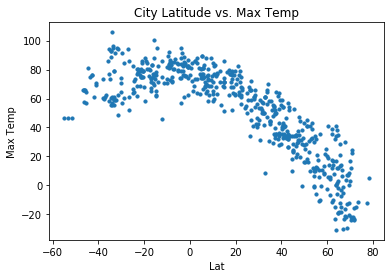

In [22]:
plt.scatter(city_samples['Lat'], city_samples['Max Temp'], marker="o", s=10)
plt.title(f"City Latitude vs. Max Temp")
plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.savefig("Max_Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

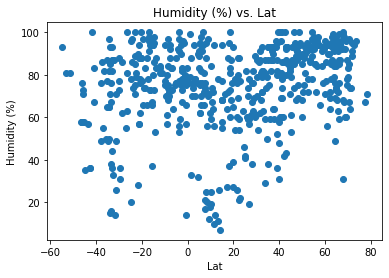

In [23]:
plt.scatter(city_samples['Lat'], city_samples['Humidity'])
plt.title(f"Humidity (%) vs. Lat")
plt.xlabel("Lat")
plt.ylabel("Humidity (%)")
plt.style.use('ggplot')
plt.savefig("Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

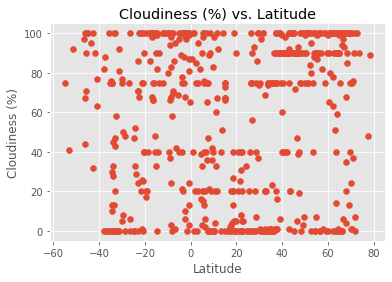

In [24]:
plt.scatter(city_samples['Lat'], city_samples['Cloudiness'])
plt.title(f"Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

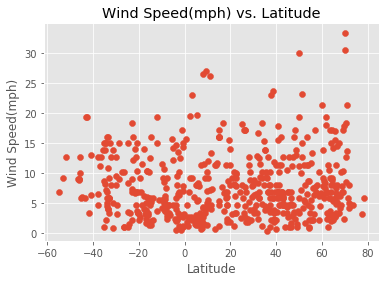

In [27]:
plt.scatter(city_samples['Lat'], city_samples['Wind Speed'])
plt.title(f"Wind Speed(mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.style.use('ggplot')
plt.savefig("Wind_Speed.png")
plt.show()